In [1]:
import pandas as pd
from neuralforecast.models import PatchTST, TFT, LSTM
from neuralforecast.core import NeuralForecast
from utilsforecast.plotting import plot_series
import matplotlib.pyplot as plt
import torch

# Load Data


In [2]:
# Options
load_model = False
training = True

assert load_model or training == True

In [3]:
price_data_path = '../../data/price.csv'
price_data = pd.read_csv(price_data_path)
print(price_data.head(5))

# TODO: integrate the LLM processed data with the price data

Y_df = pd.DataFrame(price_data)
n_time = len(Y_df['ds'].unique())
val_size = int(0.2 * n_time)
test_size = int(0.2 * n_time)

   Unnamed: 0  ds        Open        High         Low           y      Volume  \
0           0   0  117.461502  118.699996  117.239997  118.529998  17303038.0   
1           1   1  118.524002  118.980003  117.750000  118.059997  15872720.0   
2           2   2  118.143798  118.419998  116.940002  117.610000  16200626.0   
3           3   3  117.620002  118.190002  117.160003  117.500000  10847174.0   
4           4   4  116.669998  118.349998  116.449996  118.199302  19459498.0   

  unique_id  week_day  
0      AAPL         1  
1      AAPL         1  
2      AAPL         1  
3      AAPL         1  
4      AAPL         2  


In [4]:
# plot_series(Y_df.groupby('unique_id', group_keys=False).apply(lambda g:g.tail(100)))


# Model


In [5]:
horizon = 7  # 7 hours per day

models = [TFT(
    h=horizon,  # forecasting horizon
    input_size=horizon * 7,  # input sizetsih
    max_steps=1000,
    val_check_steps=100,
    early_stop_patience_steps=5,
    enable_checkpointing=True,
    hist_exog_list=['Open', 'High', 'Low', 'Volume'],
),
    PatchTST(
        h=horizon,
        input_size=horizon * 7,
        max_steps=1000,
        val_check_steps=100,
        enable_checkpointing=True,
    ),
    LSTM(
        h=horizon,
        input_size=horizon * 7,
        max_steps=1000,
        val_check_steps=100,
        early_stop_patience_steps=5
    )
]

nf = NeuralForecast(
    models=models,
    freq=1  # hourly frequency
)

if load_model:
    print('Load Model')
    nf = NeuralForecast.load(path='./ckpts/')

    if not training:
        Y_hat_df = nf.predict().reset_index()

if training:
    print('Start training')
    Y_hat_df = nf.cross_validation(df=Y_df,
                                   val_size=val_size,
                                   test_size=test_size,
                                   n_windows=None)

# Y_hat_df = nf.cross_validation(
#     df=Y_df,
#     n_windows=3,
#     val_size=val_size,
#     step_size=horizon,
#     refit=1
# )

Seed set to 1
C:\Users\Xrshawn\Programming\capstoneproject\.venv\Lib\site-packages\torch\nn\init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")
Seed set to 1
Seed set to 1


Start training


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4080 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                    | Type                     | Params | Mode 
-----------------------------------------------------------------------------
0 | loss                    | MAE                      | 0      | train
1 | padder_train            | ConstantPad1d            | 0      | train
2 | scaler                  | TemporalNorm             | 0      | train
3 | embedding               | TFTEmbedding             | 1.5 K  | train
4 | static_encoder          

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MAE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 405 K  | train
-----------------------------------------------------------
405 K     Trainable params
3         Non-trainable params
405 K     Total params
1.623     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 484 K  | train
4 | context_adapter | Linear        | 14.1 K | train
5 | mlp_decoder     | MLP           | 2.4 K  | train
----------------------------------------------------------
500 K     Trainable params
0         Non-trainable params
500 K     Total params
2.002     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

C:\Users\Xrshawn\Programming\capstoneproject\.venv\Lib\site-packages\neuralforecast\core.py:196: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


# Save Checkpoints

In [6]:
nf.save(path='./ckpts/',
        save_dataset=True,
        overwrite=True,
        )

# Plot 

In [7]:
Y_hat_df.reset_index(inplace=True)
Y_hat_df.rename(columns={'y': 'actual'}, inplace=True)
print(Y_hat_df.head(5))

  unique_id    ds  cutoff         TFT    PatchTST        LSTM      actual
0      AAPL  5522    5521  177.616089  177.508728  174.495972  177.169998
1      AAPL  5523    5521  177.614761  177.459854  174.455811  176.759994
2      AAPL  5524    5521  177.613037  177.494019  174.240646  175.490005
3      AAPL  5525    5521  177.613464  177.495087  174.446732  175.490005
4      AAPL  5526    5521  177.615799  177.481613  174.563217  175.395202


In [8]:
# Y_hat_df.drop(columns=['index'], inplace=True)
Y_hat_df.loc[:, Y_hat_df.columns != 'cutoff']

,unique_id,ds,TFT,PatchTST,LSTM,actual
0,AAPL,5522,177.616089,177.508728,174.495972,177.169998
1,AAPL,5523,177.614761,177.459854,174.455811,176.759994
2,AAPL,5524,177.613037,177.494019,174.240646,175.490005
3,AAPL,5525,177.613464,177.495087,174.446732,175.490005
4,AAPL,5526,177.615799,177.481613,174.563217,175.395202
...,...,...,...,...,...,...
971413,ZS,6897,164.339539,164.720184,164.185745,164.179992
971414,ZS,6898,164.339432,164.736420,164.159271,164.160003
971415,ZS,6899,164.338150,164.982986,164.151505,165.250000
971416,ZS,6900,164.336868,164.478897,164.495651,166.539993


In [9]:
print(len(Y_hat_df))

971418


C:\Users\Xrshawn\AppData\Local\Temp\ipykernel_18700\2966170792.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_plot = Y_plot[Y_hat_df['cutoff'].isin(cutoffs)]


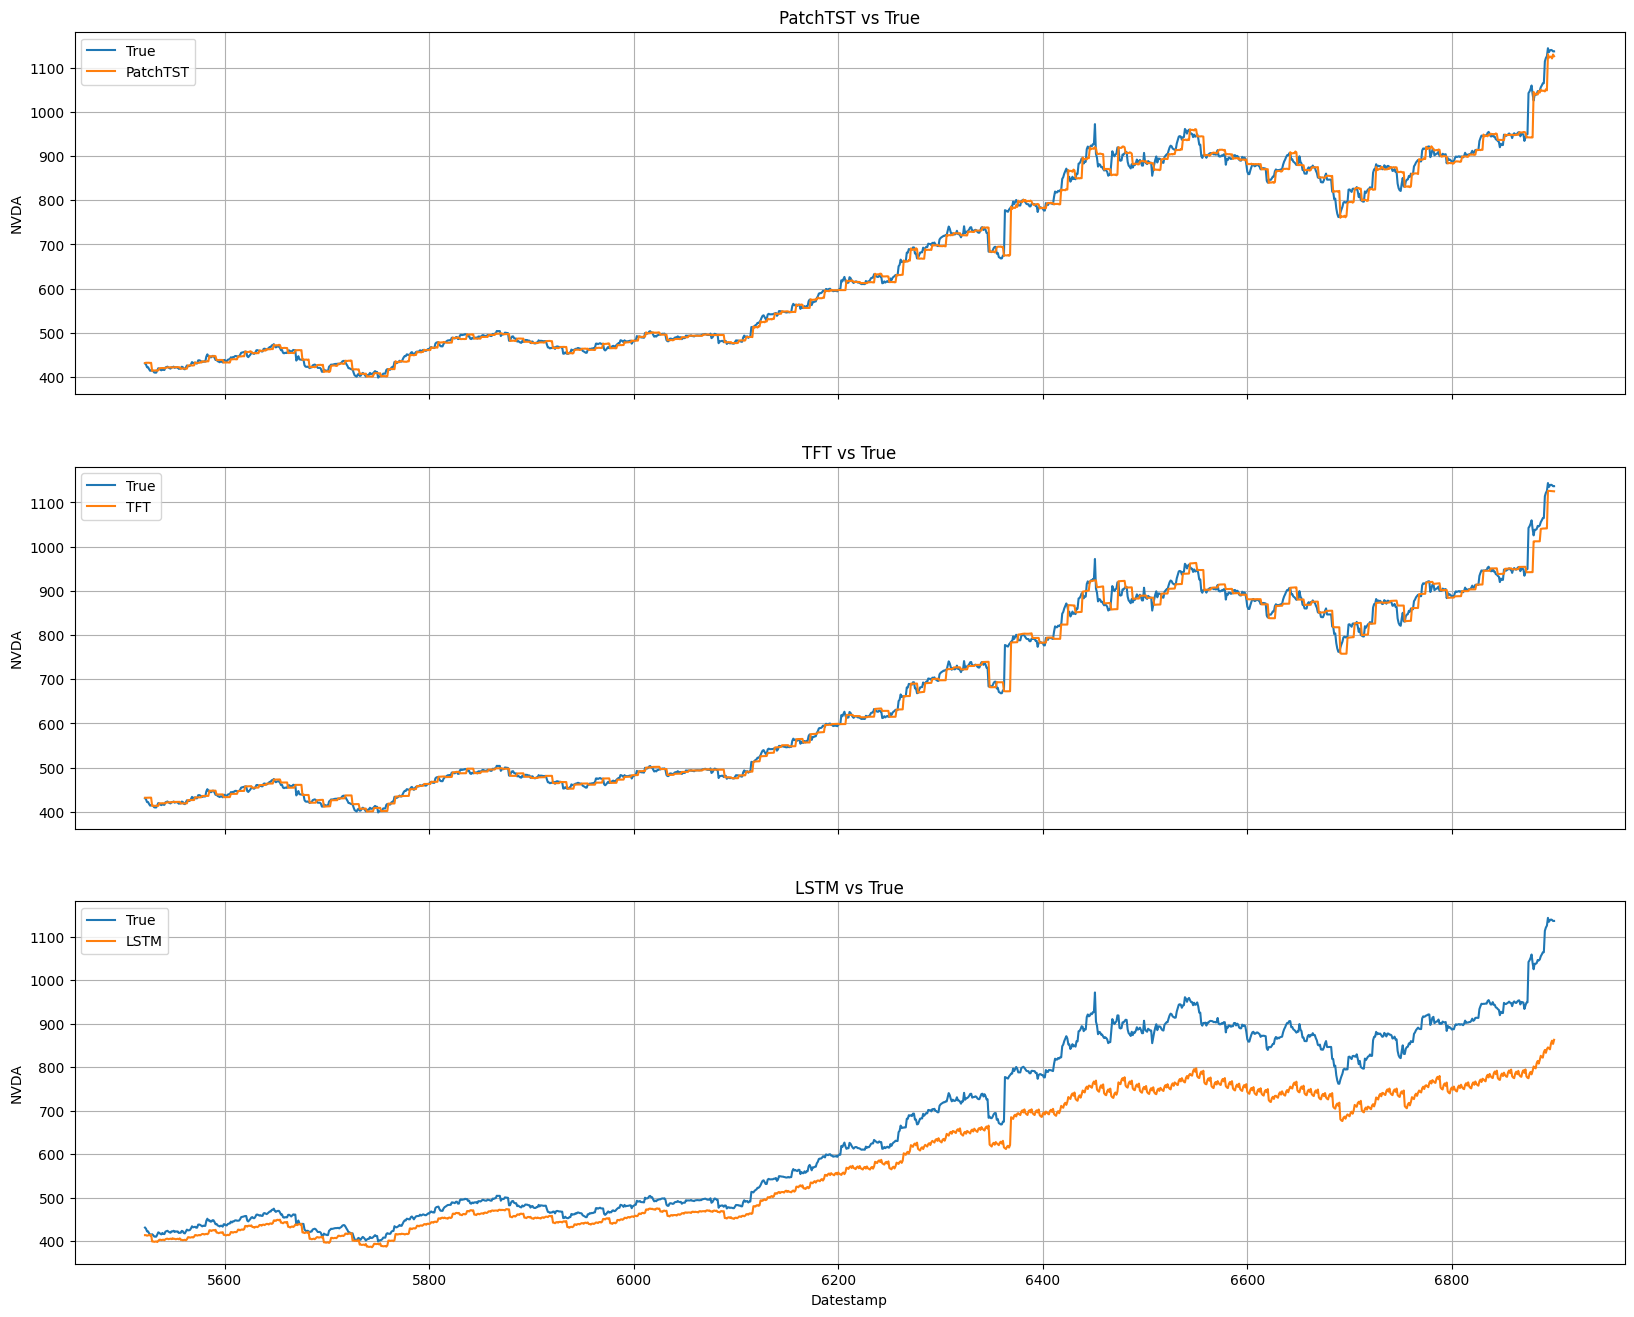

In [10]:
plot_code = 'NVDA'

# choose the stock to plot
if not training:
    Y_plot = pd.concat([Y_df.groupby('unique_id', group_keys=False).apply(lambda g: g.tail(100)), Y_hat_df])
    Y_plot = Y_plot[Y_plot['unique_id'] == plot_code]

else:
    Y_plot = Y_hat_df[Y_hat_df['unique_id'] == plot_code]
    cutoffs = Y_hat_df['cutoff'].unique()[::horizon]
    Y_plot = Y_plot[Y_hat_df['cutoff'].isin(cutoffs)]

fig, axs = plt.subplots(3, 1, figsize=(20, 16), sharex=True)

# Plotting the actual line and the PatchTST prediction
axs[0].plot(Y_plot['ds'], Y_plot['actual'], label='True')
axs[0].plot(Y_plot['ds'], Y_plot['PatchTST'], label='PatchTST')
axs[0].set_ylabel(plot_code)
axs[0].grid()
axs[0].legend()
axs[0].set_title('PatchTST vs True')

# Plotting the actual line and the TFT prediction
axs[1].plot(Y_plot['ds'], Y_plot['actual'], label='True')
axs[1].plot(Y_plot['ds'], Y_plot['TFT'], label='TFT')
axs[1].set_ylabel(plot_code)
axs[1].grid()
axs[1].legend()
axs[1].set_title('TFT vs True')

# Plotting the actual line and the LSTM prediction
axs[2].plot(Y_plot['ds'], Y_plot['actual'], label='True')
axs[2].plot(Y_plot['ds'], Y_plot['LSTM'], label='LSTM')
axs[2].set_xlabel('Datestamp')
axs[2].set_ylabel(plot_code)
axs[2].grid()
axs[2].legend()
axs[2].set_title('LSTM vs True')

# Save the figure
plt.savefig(f'../img/result_{plot_code}.png')
plt.show()

# Rough Evaluation

In [12]:
from neuralforecast.losses.numpy import mae

mae_patch_tst = mae(Y_hat_df['actual'], Y_hat_df['PatchTST'])
mae_tft = mae(Y_hat_df['actual'], Y_hat_df['TFT'])
mae_lstm = mae(Y_hat_df['actual'], Y_hat_df['LSTM'])

print(f'PatchTST: {mae_patch_tst:.4f}')
print(f'TFT: {mae_tft:.4f}')
print(f'LSTM: {mae_lstm:.4f}')

PatchTST: 2.3857
TFT: 2.4200
LSTM: 14.8032
